In [1]:
import scanpy as sc
import stlearn as st
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==2.0.0 scikit-learn==1.0.2 statsmodels==0.13.2 pynndescent==0.5.7
squidpy==1.2.3


# Import Data


In [2]:
# Metadata from reference scRNA-seq dataset
x = pd.read_csv("I:SPOPSCC-Q4358/Andrew_decon_folder/GSE181919_metadata.csv")
x

patient.id sample.id Gender  Age tissue.type subsite   hpv   
0             P4       C04      F   58          CA      OC  HPV-  \
1             P4       C04      F   58          CA      OC  HPV-   
2             P4       C04      F   58          CA      OC  HPV-   
3             P4       C04      F   58          CA      OC  HPV-   
4             P4       C04      F   58          CA      OC  HPV-   
...          ...       ...    ...  ...         ...     ...   ...   
54234        P60       C60      F   56          CA      OC  HPV-   
54235        P60       C60      F   56          CA      OC  HPV-   
54236        P60       C60      F   56          CA      OC  HPV-   
54237        P60       C60      F   56          CA      OC  HPV-   
54238        P60       C60      F   56          CA      OC  HPV-   

             cell.type  
0              T.cells  
1              T.cells  
2      Malignant.cells  
3      Malignant.cells  
4      Malignant.cells  
...                ...  
54234   B_Plasma.cells  
54235      Macrophages  
54236          T.cells  
54237          T.cells  
54238          T.cells  

[54239 rows x 8 columns]

In [3]:
# Counts data from reference scRNA-seq dataset (already normalised using SCTransform)
y = pd.read_csv("I:SPOPSCC-Q4358/Andrew_decon_folder/scRNA_SCT.csv")

In [4]:
y = y.set_index("Unnamed: 0")

In [5]:
y = y.transpose()
y.head()

Unnamed: 0          RP11-34P13.7  FO538757.2  AP006222.2  RP4-669L17.10   
AAACGGGCATGACGGA.1           0.0    0.000000    0.000000            0.0  \
AAAGATGAGCAGACTG.1           0.0    0.693147    0.000000            0.0   
AAAGATGAGTGTACTC.1           0.0    0.000000    0.000000            0.0   
AAAGATGCACTCTGTC.1           0.0    0.000000    0.693147            0.0   
AAAGCAAAGACAGGCT.1           0.0    0.000000    0.000000            0.0   

Unnamed: 0          RP11-206L10.9  FAM87B  LINC00115  FAM41C  SAMD11   
AAACGGGCATGACGGA.1            0.0     0.0        0.0     0.0     0.0  \
AAAGATGAGCAGACTG.1            0.0     0.0        0.0     0.0     0.0   
AAAGATGAGTGTACTC.1            0.0     0.0        0.0     0.0     0.0   
AAAGATGCACTCTGTC.1            0.0     0.0        0.0     0.0     0.0   
AAAGCAAAGACAGGCT.1            0.0     0.0        0.0     0.0     0.0   

Unnamed: 0             NOC2L  ...  AC145212.2  AC011043.1  AL592183.1   
AAACGGGCATGACGGA.1  0.000000  ...         0.0         0.0         0.0  \
AAAGATGAGCAGACTG.1  1.098612  ...         0.0         0.0         0.0   
AAAGATGAGTGTACTC.1  0.693147  ...         0.0         0.0         0.0   
AAAGATGCACTCTGTC.1  0.000000  ...         0.0         0.0         0.0   
AAAGCAAAGACAGGCT.1  0.693147  ...         0.0         0.0         0.0   

Unnamed: 0          AC007325.4  AC007325.2  AL354822.1  AC004556.1   
AAACGGGCATGACGGA.1         0.0         0.0         0.0    0.693147  \
AAAGATGAGCAGACTG.1         0.0         0.0         0.0    1.609438   
AAAGATGAGTGTACTC.1         0.0         0.0         0.0    1.386294   
AAAGATGCACTCTGTC.1         0.0         0.0         0.0    1.098612   
AAAGCAAAGACAGGCT.1         0.0         0.0         0.0    1.098612   

Unnamed: 0          AC233755.2  AC233755.1  AC240274.1  
AAACGGGCATGACGGA.1         0.0         0.0         0.0  
AAAGATGAGCAGACTG.1         0.0         0.0         0.0  
AAAGATGAGTGTACTC.1         0.0         0.0         0.0  
AAAGATGCACTCTGTC.1         0.0         0.0         0.0  
AAAGCAAAGACAGGCT.1         0.0         0.0         0.0  

[5 rows x 20000 columns]

# Make AnnData objects

In [6]:
anndata_obj = sc.AnnData(y)

In [7]:
anndata_obj.obs = x


In [8]:
anndata_obj.obs

patient.id sample.id Gender  Age tissue.type subsite   hpv   
0             P4       C04      F   58          CA      OC  HPV-  \
1             P4       C04      F   58          CA      OC  HPV-   
2             P4       C04      F   58          CA      OC  HPV-   
3             P4       C04      F   58          CA      OC  HPV-   
4             P4       C04      F   58          CA      OC  HPV-   
...          ...       ...    ...  ...         ...     ...   ...   
54234        P60       C60      F   56          CA      OC  HPV-   
54235        P60       C60      F   56          CA      OC  HPV-   
54236        P60       C60      F   56          CA      OC  HPV-   
54237        P60       C60      F   56          CA      OC  HPV-   
54238        P60       C60      F   56          CA      OC  HPV-   

             cell.type  
0              T.cells  
1              T.cells  
2      Malignant.cells  
3      Malignant.cells  
4      Malignant.cells  
...                ...  
54234   B_Plasma.cells  
54235      Macrophages  
54236          T.cells  
54237          T.cells  
54238          T.cells  

[54239 rows x 8 columns]

In [9]:
data = st.Read10X("I:/SPOPSCC-Q4358/Visium_FFPE_Jaz_2/D1_PA21P7147_S01/")
tissue_lab_file = pd.read_csv("I:/SPOPSCC-Q4358/Visium_FFPE_Jaz_2/Andrew_loupe/D1_149_whole.csv", dtype={'D1_149':'Int32'})
tissue_lab_file.index = tissue_lab_file['Barcode']
tissue_lab_file = tissue_lab_file.drop(columns="Barcode")
tissue_lab_file['D1_149'] = tissue_lab_file['D1_149'].astype(str)
data.obs['tissue_type'] = tissue_lab_file['D1_149'].astype('category')


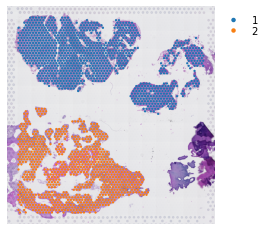

In [10]:
#adds and plots sample infomation
batch = []
for i in data.obs['tissue_type']:
    if i == "3":
        x = "2"
    elif i == "<NA>":
        x = "<NA>"
    else:
        x = "1"
    batch.append(x)
    
data.obs['batch'] = batch
data.obs['batch'] = data.obs['batch'].astype('category')
data = data[data.obs.batch != "<NA>", :]
st.pl.cluster_plot(data, use_label='batch')

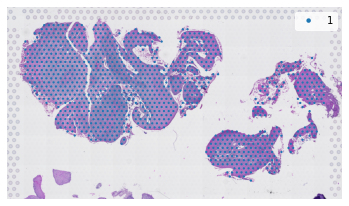

In [11]:
tumour = data[data.obs["batch"] == "1"]
st.pl.cluster_plot(tumour, use_label='batch')

In [12]:
SCT = pd.read_csv("I:/SPOPSCC-Q4358/Andrew_decon_folder/Visium_SCT.csv")
clust = pd.read_csv("I:/SPOPSCC-Q4358/Andrew_decon_folder/Visium_clusters.csv")

In [13]:
SCT = SCT.set_index("Unnamed: 0")

In [14]:
SCT

AAACAACGAATAGTTC.1  AAACAATCTACTAGCA.1  AAACGGGTTGGTATCC.1   
Unnamed: 0                                                               
NOC2L                 1.609438            0.693147            0.693147  \
KLHL17                0.000000            0.000000            0.000000   
PLEKHN1               0.000000            0.000000            0.000000   
PERM1                 0.000000            0.000000            0.000000   
HES4                  1.791759            0.000000            0.693147   
...                        ...                 ...                 ...   
TBL1Y                 0.000000            0.000000            0.000000   
USP9Y                 0.000000            0.000000            0.000000   
DDX3Y                 0.000000            0.693147            1.386294   
TMSB4Y                0.000000            0.000000            0.000000   
KDM5D                 0.693147            0.693147            0.000000   

            AAACGTGTTCGCCCTA.1  AAAGACCCAAGTCGCG.1  AAAGCTTGCCTACATA.1   
Unnamed: 0                                                               
NOC2L                 0.693147            0.693147            0.693147  \
KLHL17                0.000000            0.693147            0.000000   
PLEKHN1               0.693147            1.098612            0.000000   
PERM1                 0.000000            0.000000            0.000000   
HES4                  0.000000            0.693147            1.386294   
...                        ...                 ...                 ...   
TBL1Y                 0.000000            0.000000            0.000000   
USP9Y                 0.000000            0.000000            0.000000   
DDX3Y                 0.000000            0.000000            1.098612   
TMSB4Y                0.000000            0.000000            0.000000   
KDM5D                 0.693147            0.693147            0.693147   

            AAAGGGCAGCTTGAAT.1  AAAGTCACTGATGTAA.1  AAATAGCTTAGACTTT.1   
Unnamed: 0                                                               
NOC2L                 1.386294            0.693147            1.098612  \
KLHL17                0.000000            0.000000            0.000000   
PLEKHN1               0.000000            1.098612            0.000000   
PERM1                 0.000000            0.000000            0.000000   
HES4                  1.386294            0.693147            0.693147   
...                        ...                 ...                 ...   
TBL1Y                 0.693147            0.000000            0.000000   
USP9Y                 0.000000            0.000000            0.000000   
DDX3Y                 0.693147            0.000000            0.000000   
TMSB4Y                0.000000            0.000000            0.000000   
KDM5D                 0.693147            1.098612            0.000000   

            AAATGCTCGTTACGTT.1  ...  TTGGATCGACTTCTGG.1  TTGGATTGGGTACCAC.1   
Unnamed: 0                      ...                                           
NOC2L                 1.791759  ...            0.000000            0.693147  \
KLHL17                0.000000  ...            0.000000            0.000000   
PLEKHN1               0.000000  ...            0.000000            1.098612   
PERM1                 0.000000  ...            0.000000            0.000000   
HES4                  0.000000  ...            1.386294            0.693147   
...                        ...  ...                 ...                 ...   
TBL1Y                 0.000000  ...            0.000000            0.000000   
USP9Y                 0.000000  ...            0.000000            0.000000   
DDX3Y                 0.000000  ...            0.000000            0.000000   
TMSB4Y                0.000000  ...            0.000000            0.000000   
KDM5D                 1.098612  ...            0.000000            0.000000   

            TTGGCCATCTTGCGCT.1  TTGGCTCGCATGAGAC.1  TTGGGTTTATTCAGCG.1   
Unnamed: 0           

In [15]:
genes_to_subset = SCT.index.tolist()
genes = []
not_genes = []
for gene in genes_to_subset:
    if gene in tumour.var.index.to_list():
        genes.append(gene)
    else:
        not_genes.append(gene)
tumour_subset = tumour[:,genes]

In [16]:
SCT_subset = SCT.loc[~SCT.index.isin(not_genes)].reset_index(drop=True)

In [17]:
SCT_subset = SCT_subset.transpose()

In [18]:
tumour_subset.X = SCT_subset.values

In [19]:
adata_st = tumour_subset
adata_sc = anndata_obj

In [20]:
clust = clust.set_index("Unnamed: 0")
adata_st.obs['cluster'] = clust['x'].astype('category')

In [ ]:
sc.tl.pca(adata_sc,n_comps=30)
sc.pp.neighbors(adata_sc, n_pcs = 30, n_neighbors = 20)
sc.tl.umap(adata_sc)

In [ ]:
adata_sc.obs["barcode"] = y.columns.to_list()


# Plot Spatial and UMAP of scRNA-seq

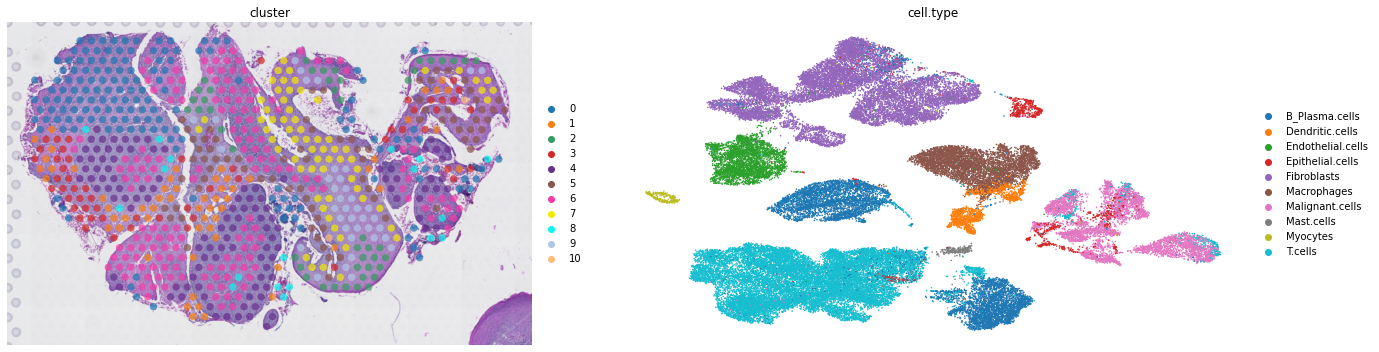

In [154]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sc.pl.spatial(
    adata_st, color="cluster", alpha=0.7, frameon=False, show=False, ax=axs[0]
)
sc.pl.umap(
    adata_sc, color="cell.type", size=10, frameon=False, show=False, ax=axs[1]
)
plt.tight_layout()

# Run Tangram Deconvolution

In [155]:
sc.tl.rank_genes_groups(adata_sc, groupby="cell.type", use_raw=False)
markers_df = pd.DataFrame(adata_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

849

In [156]:
tg.pp_adatas(adata_sc, adata_st, genes=markers)

INFO:root:673 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:13227 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [160]:
ad_map = tg.map_cells_to_space(adata_sc, adata_st,
   # mode="cells",
     mode="clusters",
    cluster_label='cell.type',  # .obs field w cell types
    density_prior='rna_count_based',
    num_epochs=500,
     #device="cuda:0"
    device='cpu'
)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 673 genes and rna_count_based density_prior in clusters mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.433, KL reg: 0.155
Score: 0.592, KL reg: 0.002
Score: 0.592, KL reg: 0.002
Score: 0.592, KL reg: 0.002
Score: 0.592, KL reg: 0.002


INFO:root:Saving results..


In [161]:
ad_map

AnnData object with n_obs × n_vars = 10 × 795
    obs: 'cell.type', 'cluster_density'
    var: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'tissue_type', 'cluster', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

# Visulise Deconvolution

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


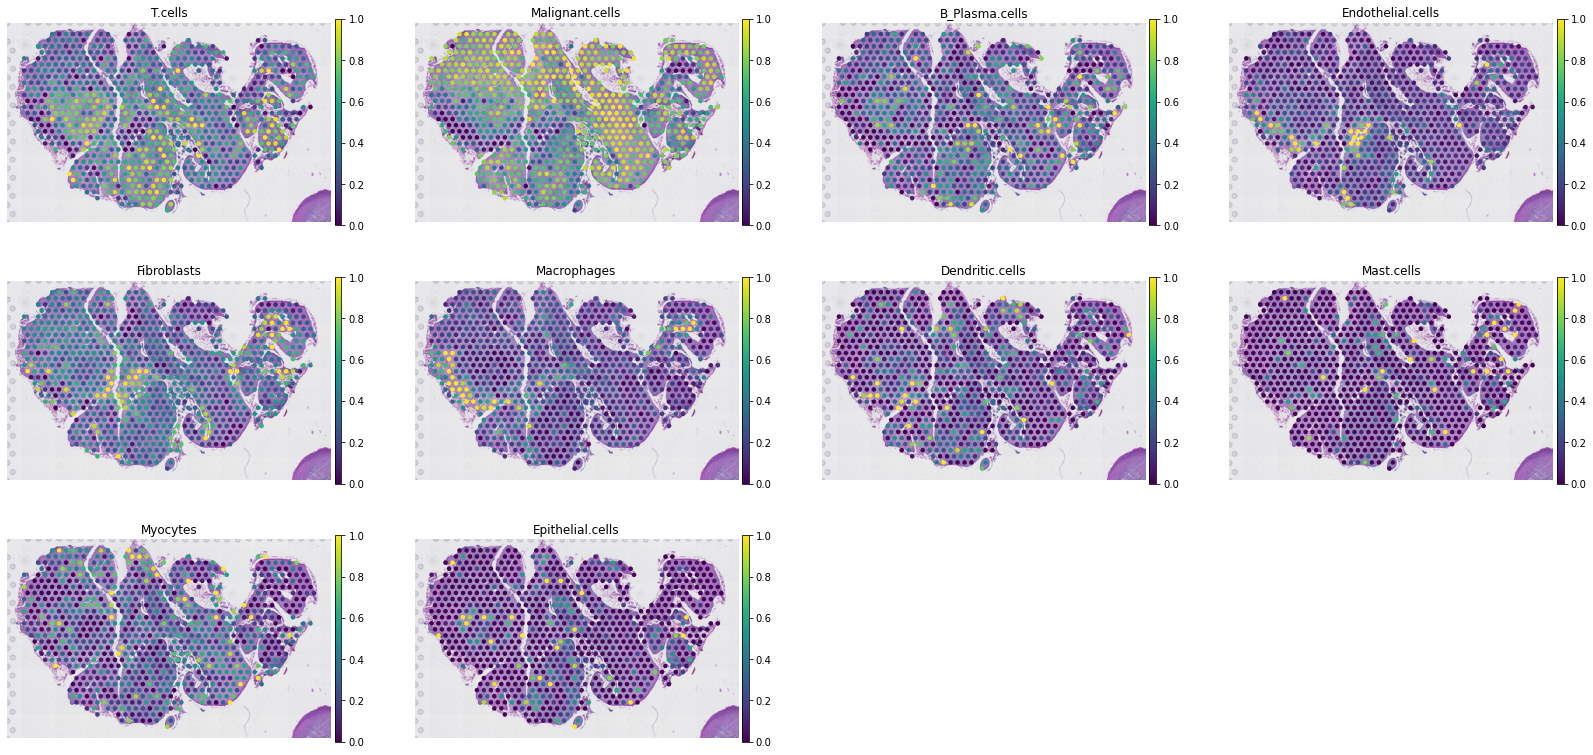

In [162]:
tg.project_cell_annotations(ad_map, adata_st, annotation="cell.type")
annotation_list = list(pd.unique(adata_sc.obs['cell.type']))
tg.plot_cell_annotation_sc(adata_st, annotation_list,perc=0.02)

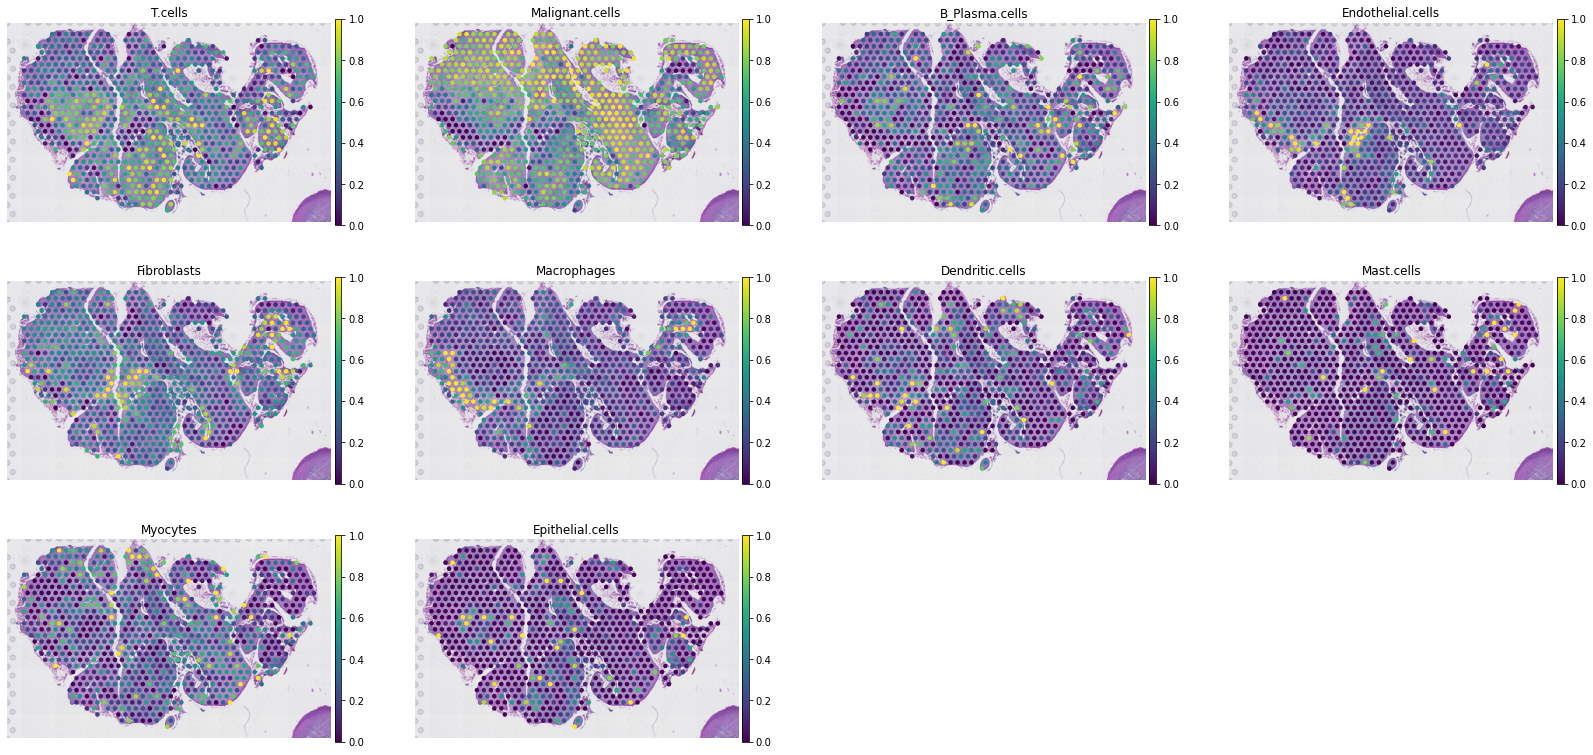

In [164]:
tg.plot_cell_annotation_sc(adata_st, annotation_list, perc=0.02)

In [165]:
adata_st.obsm['tangram_ct_pred']

T.cells  Fibroblasts  B_Plasma.cells  Malignant.cells   
AAACAACGAATAGTTC-1  0.000443     0.001195        0.002424         0.001547  \
AAACAATCTACTAGCA-1  0.001767     0.000918        0.000416         0.001680   
AAACGGGTTGGTATCC-1  0.000903     0.001469        0.001086         0.001515   
AAAGACCCAAGTCGCG-1  0.000465     0.000817        0.002400         0.001765   
AAAGGGCAGCTTGAAT-1  0.002386     0.001123        0.000138         0.001194   
...                      ...          ...             ...              ...   
TTGGCCATCTTGCGCT-1  0.001543     0.002307        0.000250         0.000104   
TTGGCTCGCATGAGAC-1  0.001619     0.000929        0.000945         0.001465   
TTGTCGTTCAGTTACC-1  0.000853     0.000950        0.000400         0.001519   
TTGTGGCCCTGACAGT-1  0.001122     0.001192        0.000825         0.001663   
TTGTTAGCAAATTCGA-1  0.002201     0.001280        0.002334         0.001015   

                    Macrophages  Endothelial.cells  Dendritic.cells   
AAACAACGAATAGTTC-1     0.001047           0.000313         0.000463  \
AAACAATCTACTAGCA-1     0.000627           0.001060         0.001205   
AAACGGGTTGGTATCC-1     0.000925           0.000522         0.000020   
AAAGACCCAAGTCGCG-1     0.001090           0.001165         0.003414   
AAAGGGCAGCTTGAAT-1     0.000346           0.000135         0.005002   
...                         ...                ...              ...   
TTGGCCATCTTGCGCT-1     0.000754           0.002588         0.003401   
TTGGCTCGCATGAGAC-1     0.000959           0.001200         0.000029   
TTGTCGTTCAGTTACC-1     0.001534           0.000676         0.000109   
TTGTGGCCCTGACAGT-1     0.001623           0.000400         0.001062   
TTGTTAGCAAATTCGA-1     0.000004           0.001371         0.000024   

                    Epithelial.cells  Myocytes  Mast.cells  
AAACAACGAATAGTTC-1          0.001155  0.001958    0.000008  
AAACAATCTACTAGCA-1          0.000342  0.001068    0.000155  
AAACGGGTTGGTATCC-1          0.000018  0.000292    0.000029  
AAAGACCCAAGTCGCG-1          0.002601  0.002212    0.002977  
AAAGGGCAGCTTGAAT-1          0.001277  0.000012    0.000024  
...                              ...       ...         ...  
TTGGCCATCTTGCGCT-1          0.000018  0.001731    0.004821  
TTGGCTCGCATGAGAC-1          0.000028  0.000029    0.000004  
TTGTCGTTCAGTTACC-1          0.001719  0.001345    0.000294  
TTGTGGCCCTGACAGT-1          0.000025  0.000762    0.000261  
TTGTTAGCAAATTCGA-1          0.001878  0.001840    0.000001  

[795 rows x 10 columns]

In [166]:
for ct in annotation_list:
    data = adata_st.obsm['tangram_ct_pred'][ct].values
    adata_st.obs[ct] = np.clip(data, 0, np.quantile(data, 0.99))

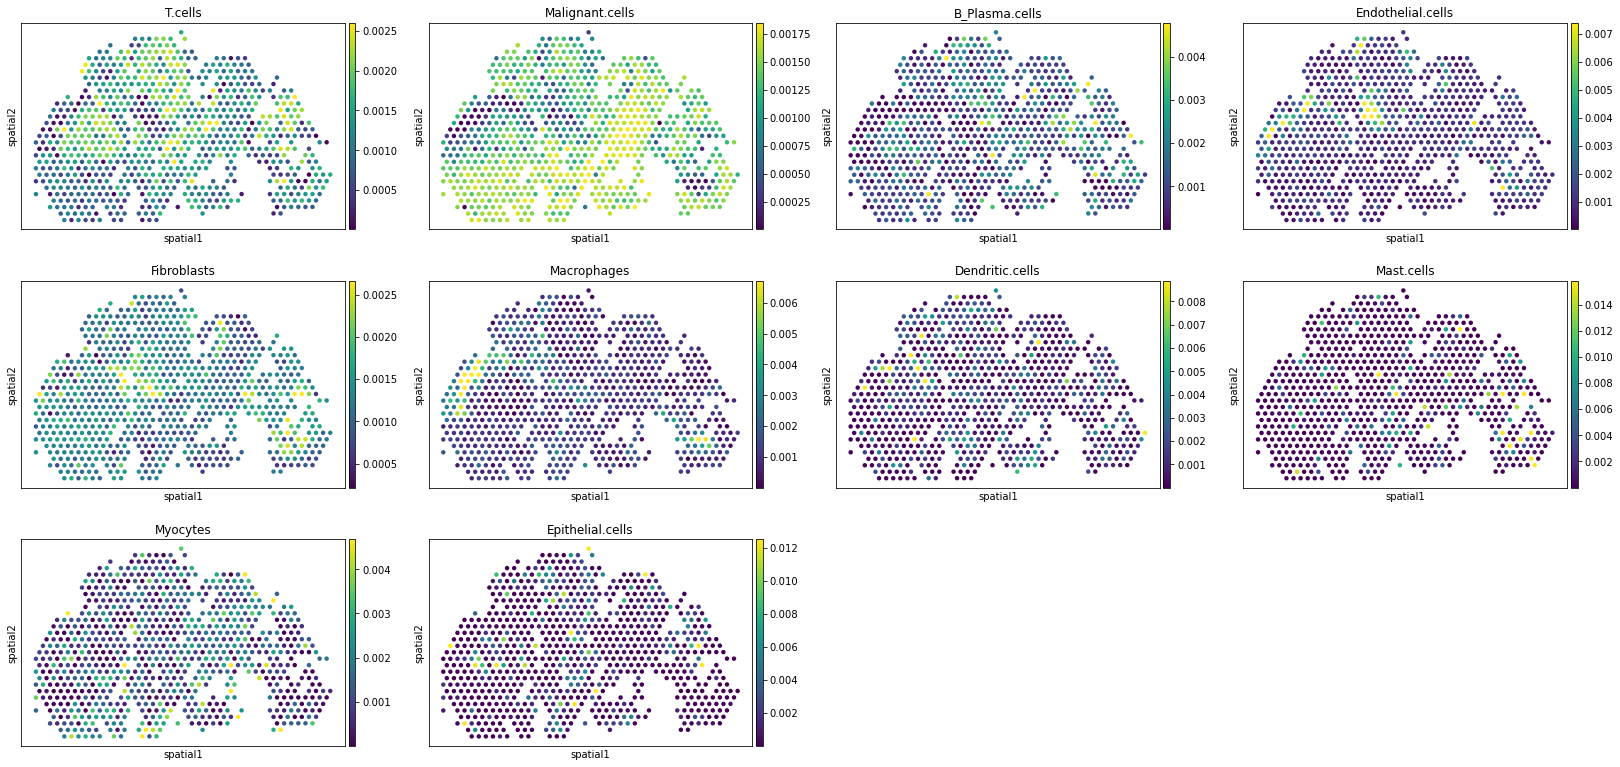

In [167]:
sc.pl.embedding(adata_st, basis="spatial", color=annotation_list, s=80)

# Export Data

In [171]:
decon_data = adata_st.obsm['tangram_ct_pred']
decon_data.to_csv('I:/SPOPSCC-Q4358/Andrew_decon_folder/Tangram_decon.csv')